This notebook creates tables that go into the main body of the paper.

In [69]:
import sys
import glob
import re
import fnmatch
import math
import datetime
import re
import os
from os import listdir
from os.path import join, isfile, basename

import itertools

import numpy as np
from numpy import float32, int32, uint8, dtype, genfromtxt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from scipy.stats import ttest_ind
from scipy.stats import pearsonr

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, FormatStrFormatter
%matplotlib inline

sys.path.append("../") # go to parent dir
import template_common as tc

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# Global options
write_files_and_tables = False

In [6]:
dist_df, jac_df, hess_df, timeMem_df = tc.readStatTables()
grouped_label_table, total_table = tc.groupTables( dist_df, jac_df, hess_df, timeMem_df, tc.template_list  )

../template_common.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['TEMPLATE'] = df.apply(lambda x: template_name(x['TEMPLATE']), axis=1)
../template_common.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ALG'] = df.apply(lambda x: alg_name(x['ALG']), axis=1)
../template_common.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

# Skeleton dist stat table
Table 3

In [ ]:
# grouped_label_table[ grouped_label_table.CPUTIME_hr_mean == float('nan') ]
# grouped_label_table[ grouped_label_table.ALG == 'Elastix B']

In [ ]:
skeleton_dist_stat_f = 'skeleton_dist_stat_raw_%s.tex'%(datetime.date.today().strftime('%Y%m%d'))

cols = ['TEMPLATE', 'ALG','DISTANCE_mean','DISTANCE_std']
antsa_df = grouped_label_table[grouped_label_table.ALG == 'ANTs A'][cols]
cmtka_df = grouped_label_table[grouped_label_table.ALG == 'CMTK A'][cols]
elastixa_df = grouped_label_table[grouped_label_table.ALG == 'Elastix A'][cols]

# Choose the algorithm that works best per template
best_df = grouped_label_table.sort_values('DISTANCE_mean') \
    .groupby('TEMPLATE', as_index=False) \
    .first()[cols]

# combine these four tables
# The names of the columns for the 'best
total_table = best_df.set_index('TEMPLATE') \
    .join( antsa_df.set_index('TEMPLATE'), rsuffix='_antsA') \
    .join( cmtka_df.set_index('TEMPLATE'), rsuffix='_cmtkA') \
    .join( elastixa_df.set_index('TEMPLATE'), rsuffix='_elastixA') \
    .reset_index()

# Format the columns nicely
tc.meanStdStringCol( total_table, 'Best', 'DISTANCE_mean', 'DISTANCE_std')
tc.meanStdStringCol( total_table, 'ANTs A', 'DISTANCE_mean_antsA', 'DISTANCE_std_antsA')
tc.meanStdStringCol( total_table, 'CMTK A', 'DISTANCE_mean_cmtkA', 'DISTANCE_std_cmtkA')
tc.meanStdStringCol( total_table, 'Elastix A', 'DISTANCE_mean_elastixA', 'DISTANCE_std_elastixA')


skel_dist_table = total_table[['TEMPLATE','ALG','Best','ANTs A','CMTK A','Elastix A']].sort_values('Best')


if( write_files_and_tables ):
    print( 'writing : ', skeleton_dist_stat_f )
    with open( skeleton_dist_stat_f, 'w') as f:
        f.write( skel_dist_table.to_latex())
        
skel_dist_table

## Table 7
Skeleton distance sorted by mean distance

In [44]:
dist_meanStdMedian_f = 'tables/dist_meanStdMedian_%s.tex'%(datetime.date.today().strftime('%Y%m%d'))


tmask = dist_df.apply( lambda x: (x['TEMPLATE'] in tc.template_list ), axis=1)
t7_df = dist_df.loc[tmask]

t7_df = t7_df.loc[ (t7_df.LABEL == -1) & ((t7_df.normalization == 'warp') | (t7_df.normalization == 'na'))]
table7 = tc.clean_names(t7_df)[['TEMPLATE','ALG','DISTANCE_mean','DISTANCE_std','DISTANCE_median']]
table7['DISTANCE_mean'] = table7.apply(lambda x: float(x['DISTANCE_mean']), axis=1) 
table7['DISTANCE_median'] = table7.apply(lambda x: float(x['DISTANCE_median']), axis=1) 

pd.options.display.float_format = '{:,.2f}'.format
table7 = table7.sort_values('DISTANCE_mean', ascending=True )


if( write_files_and_tables ):
    print( 'writing : ', dist_meanStdMedian_f )
    with open( dist_meanStdMedian_f, 'w') as f:
        f.write( table7.to_latex())
        
table7

writing :  tables/dist_meanStdMedian_20190909.tex


/groups/saalfeld/home/bogovicj/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/groups/saalfeld/home/bogovicj/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TEMPLATE,ALG,DISTANCE_mean,DISTANCE_std,DISTANCE_median
75,JRC2018,ANTs A,3.97,3.65,3.08
75,Tefor,ANTs A,4.00,3.68,3.16
75,JRC2018,CMTK A,4.03,3.70,3.16
75,JRC2018,CMTK B,4.04,3.70,3.16
75,JRC2018,Elastix A,4.05,3.73,3.24
75,JFRC2013,Elastix A,4.06,3.68,3.24
75,JFRC2013,Elastix B,4.10,3.73,3.24
75,JFRC2010,Elastix A,4.11,3.68,3.24
75,Tefor,Elastix A,4.12,3.69,3.24
75,JRC2018,Elastix B,4.13,3.78,3.24


## Jacobian determinant 

Table 4

In [ ]:
# grouped_label_table.head()
smoothness_stat_f = 'smoothness_stat_raw_%s.tex'%(datetime.date.today().strftime('%Y%m%d'))

sm_cols = ['TEMPLATE', 'ALG','JAC_std','HES_mean', 'DISTANCE_mean']
sm_antsa_df = grouped_label_table[grouped_label_table.ALG == 'ANTs A'][sm_cols]
sm_cmtka_df = grouped_label_table[grouped_label_table.ALG == 'CMTK A'][sm_cols]
sm_elastixa_df = grouped_label_table[grouped_label_table.ALG == 'Elastix A'][sm_cols]

sm_best_df = grouped_label_table.sort_values('DISTANCE_mean') \
    .groupby('TEMPLATE', as_index=False) \
    .first()[sm_cols]
    
sm_total_table = sm_best_df.set_index('TEMPLATE') \
    .join( sm_antsa_df.set_index('TEMPLATE'), rsuffix='_antsA') \
    .join( sm_cmtka_df.set_index('TEMPLATE'), rsuffix='_cmtkA') \
    .join( sm_elastixa_df.set_index('TEMPLATE'), rsuffix='_elastixA') \
    .reset_index()
    

smooth_stat_table = sm_total_table[['TEMPLATE',
                                'JAC_std','JAC_std_antsA','JAC_std_cmtkA','JAC_std_elastixA',
                                'HES_mean', 'HES_mean_antsA', 'HES_mean_cmtkA', 'HES_mean_elastixA'
                              ]]


if( write_files_and_tables ):
    print( 'writing : ', smoothness_stat_f )
    with open( smoothness_stat_f, 'w') as f:
        f.write( smooth_stat_table.to_latex())

smooth_stat_table

## Distance vs Jacobian
Figure 5

In [ ]:
fout_prefix='distWarpNorm_vs_Jacobian_raw_%s'%(datetime.date.today().strftime('%Y%m%d'))

ax = tc.make_scatter_plot( grouped_label_table, 'JAC_std', 'DISTANCE_mean', alpha=0.8 )

ax.xaxis.set_minor_locator( MultipleLocator(0.1) )
ax.yaxis.set_minor_locator( MultipleLocator(0.5) )
plt.grid( which='minor', linestyle=':', dashes=(3,3))

plt.xlabel('Jacobian determinant standard deviation', size=18)
plt.ylabel('Mean distance (um)', size=18)

fig = plt.gcf()
a = fig.set_size_inches( 16, 10 ) 

if( write_files_and_tables ):
    print( 'writing : ', fout_prefix )
    plt.savefig(fout_prefix+".svg")
    plt.savefig(fout_prefix+".pdf")
    plt.savefig(fout_prefix+".png")

## Distance vs Hessian
Figure 5a

In [ ]:
fout_prefix='distWarpNorm_vs_Hessian_raw_%s'%(datetime.date.today().strftime('%Y%m%d'))


ax = tc.make_scatter_plot( grouped_label_table, 'HES_mean', 'DISTANCE_mean' )

ax.xaxis.set_minor_locator( MultipleLocator(0.02) )
ax.yaxis.set_minor_locator( MultipleLocator(0.2) )
plt.grid( which='minor', linestyle=':', dashes=(3,3))

plt.xlabel('Hessian mean', size=18)
plt.ylabel('Mean distance (um)', size=18)

fig = plt.gcf()
a = fig.set_size_inches( 16, 10 ) 

if( write_files_and_tables ):
    print( 'writing : ', fout_prefix )
    plt.savefig(fout_prefix+".svg")
    plt.savefig(fout_prefix+".pdf")
    plt.savefig(fout_prefix+".png")

## Jacobian vs Hessian
Figure 5c

In [71]:
X = grouped_label_table['JAC_std'].values.reshape(-1,1)
y = grouped_label_table['HES_mean'].values.reshape(-1,1)
linReg = LinearRegression().fit( X, y )

slope = linReg.coef_[0][0]
r2 = linReg.score(X, y)

print( 'slope %f'%(slope))
print( 'r2 %f'%(r2))

pearsonr( X, y )
# print( 'corr coef %f'%(pearsonr( X, y )))

slope 0.114238
r2 0.394149


(array([0.62781293]), array([1.44851647e-05]))

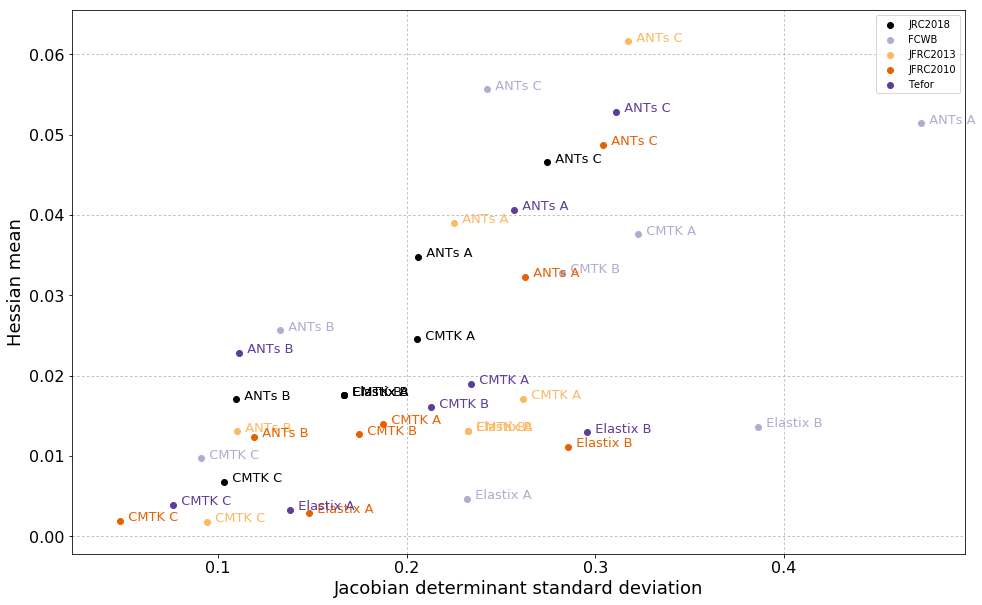

In [45]:
fout_prefix='Hessian_vs_Jacobian_raw_%s'%(datetime.date.today().strftime('%Y%m%d'))


ax = tc.make_scatter_plot( grouped_label_table, 'JAC_std', 'HES_mean')

ax.xaxis.set_minor_locator( MultipleLocator(0.2) )
ax.yaxis.set_minor_locator( MultipleLocator(0.02) )
plt.grid( which='minor', linestyle=':', dashes=(3,3))

plt.xlabel('Jacobian determinant standard deviation', size=18)
plt.ylabel('Hessian mean', size=18)

fig = plt.gcf()
a = fig.set_size_inches( 16, 10 )



if( write_files_and_tables ):
    print( 'writing : ', fout_prefix )
    plt.savefig(fout_prefix+".svg")
    plt.savefig(fout_prefix+".pdf")
    plt.savefig(fout_prefix+".png")

## Distance vs CpuTime
Figure 6

In [ ]:
# grouped_label_table.head()

In [ ]:
# Big figure

fout_prefix='figs/distWarpNorm_vs_cputime_raw_%s'%(datetime.date.today().strftime('%Y%m%d'))


ax = tc.make_scatter_plot( grouped_label_table, 'CPUTIME_hr_mean', 'DISTANCE_mean')

ax.yaxis.set_minor_locator( MultipleLocator(0.2) )
plt.grid( which='minor', linestyle=':', dashes=(3,3))

ax.set_xscale('log')
plt.xlim(0.1,200)
plt.ylim(3.95,6.5)


plt.ylabel('CPU hours', size=18)
plt.ylabel('Mean distance (um)', size=18)

fig = plt.gcf()
a = fig.set_size_inches( 16, 10 )

if( write_files_and_tables ):
    print( 'writing : ', fout_prefix )
    plt.savefig(fout_prefix+".svg")
    plt.savefig(fout_prefix+".pdf")
    plt.savefig(fout_prefix+".png")

In [ ]:
# Big figure

fout_prefix='figs/distWarpNorm_vs_cputime_best_raw_%s'%(datetime.date.today().strftime('%Y%m%d'))


ax = tc.make_scatter_plot( grouped_label_table, 'CPUTIME_hr_mean', 'DISTANCE_mean')

ax.yaxis.set_minor_locator( MultipleLocator(0.2) )
plt.grid( which='minor', linestyle=':', dashes=(3,3))

ax.set_xscale('log')

plt.xlim(0.1,200)
plt.ylim(3.95,4.2)

# ax.xaxis.set_minor_locator( MultipleLocator(0.2) )
# ax.yaxis.set_minor_locator( MultipleLocator(0.02) )
# plt.grid( which='minor', linestyle=':', dashes=(3,3))

plt.xlabel('CPU hours', size=18)
plt.ylabel('Mean distance (um)', size=18)

fig = plt.gcf()
a = fig.set_size_inches( 16, 3 )

if( write_files_and_tables ):
    print( 'writing : ', fout_prefix )
    plt.savefig(fout_prefix+".svg")
    plt.savefig(fout_prefix+".pdf")
    plt.savefig(fout_prefix+".png")

## Skeleton distance stats table
Table 7

In [ ]:
dist_stat_f = 'distWarpStats_table_raw_%s.tex'%(datetime.date.today().strftime('%Y%m%d'))

table7 = dist_df[ (dist_df.LABEL==-1) & \
                 ((dist_df.normalization=='warp') | (dist_df.normalization=='na'))]

tmask = table7.apply(lambda x: x['TEMPLATE'] in tc.template_list, axis=1)
table7 = table7.loc[tmask]
table7 = table7.reset_index( drop=True )

table7['TEMPLATE'] = table7.apply(lambda x: tc.template_name(x['TEMPLATE']), axis=1)
table7['ALG'] = table7.apply(lambda x: tc.alg_name(x['ALG']), axis=1)

table7 = table7[['TEMPLATE','ALG','DISTANCE_mean', 'DISTANCE_std', 'DISTANCE_median']] \
    .reset_index( drop=True ) \
    .sort_values( by=['DISTANCE_mean'] )


if( write_files_and_tables ):
    print( 'writing : ', dist_stat_f )
    with open( dist_stat_f, 'w') as f:
        f.write( table7.to_latex())
        
table7

## Smoothness stats table
Table 8

In [ ]:
smooth_stat_f = 'smoothnessStats_table_raw_%s.tex'%(datetime.date.today().strftime('%Y%m%d'))

jac_df_clean = tc.clean_names( jac_df ).loc[ jac_df.label == -1 ]
hess_df_clean = tc.clean_names( hess_df ).loc[ hess_df.label == -1 ]

# hess_df_clean
# jac_df_clean

sm_table = jac_df_clean.set_index('TA').join( hess_df_clean.set_index('TA'), lsuffix='_j' )

tc.meanStdStringCol( sm_table, 'JACMeanStd', 'JAC_mean', 'JAC_std', formatstring='%0.4f (%0.4f)')
tc.meanStdStringCol( sm_table, 'HESMeanStd', 'HES_mean', 'HES_std', formatstring='%0.4f (%0.4f)')

table8 = sm_table[['TEMPLATE','ALG','JACMeanStd', 'HESMeanStd']]
# sm_table = sm_table.groupby(['TEMPLATE','ALG'])
table8.reset_index( drop=True)


if( write_files_and_tables ):
    print( 'writing : ', smooth_stat_f )
    with open( smooth_stat_f, 'w') as f:
        f.write( table8.to_latex())

table8

# Dist v Jacobian - Affine normalization
Figure 9

In [ ]:
statdir='/nrs/saalfeld/john/projects/flyChemStainAtlas/all_evals/stats_2019Jul'
dist_all_df, jac_all_df, hess_all_df, timeMem_all_df = tc.readStatTables( statdir )

dist_aff_df = dist_all_df[ (dist_all_df.normalization=='affine') | (dist_all_df.normalization=='na')]
aff_grouped_df = tc.groupTables( dist_aff_df, jac_all_df, hess_all_df, timeMem_all_df, tc.template_list  )


In [ ]:
fout_prefix='distAffineNorm_vs_jacStd_raw_%s'%(datetime.date.today().strftime('%Y%m%d'))


ax = tc.make_scatter_plot( aff_grouped_df, 'JAC_std', 'DISTANCE_mean')

ax.xaxis.set_minor_locator( MultipleLocator(0.2) )
ax.yaxis.set_minor_locator( MultipleLocator(0.2) )
plt.grid( which='minor', linestyle=':', dashes=(3,3))

plt.xlabel('Jacobian determinant standard deviation', size=18)
plt.ylabel('Mean distance (um)', size=18)

fig = plt.gcf()
a = fig.set_size_inches( 16, 10 ) 

if( write_files_and_tables ):
    print( 'writing : ', fout_prefix )
    plt.savefig(fout_prefix+".svg")
    plt.savefig(fout_prefix+".pdf")
    plt.savefig(fout_prefix+".png")

## Dist v Speed - by Resolution
Figure 10 and Table 6

In [ ]:
cmv = plt.cm.get_cmap('viridis')
cmm = plt.cm.get_cmap('magma')
cmp = plt.cm.get_cmap('plasma')

template_color_map_res_raw = { 
                      'Tefor':cmv(0.2),
                      'TeforBrain_f':cmv(0.2),
                      'TeforBrain_1p2iso':cmv(0.4),
                      'TeforBrain_2p4iso':cmv(0.6),
                      'TeforBrain_3p6iso':cmv(0.8),
                      'JRC2018':cmp(0.1),
                      'F-antsFlip_lo':cmp(0.2),
                      'F-antsFlip_lof':cmp(0.2),
                      'jrc18_0p6':cmp(0.2),
                      'jrc18_1p2':cmp(0.4),
                      'jrc18_2p4':cmp(0.6),
                      'jrc18_3p6':cmp(0.8),
                     }
legend_order = ['JRC2018', 'JFRC2018 (1.2um)', 'JFRC2018 (2.4um)','JFRC2018 (3.6um)', \
                'Tefor', 'Tefor (1.2um)', 'Tefor (2.4um)', 'Tefor (3.6um)']

In [ ]:
template_color_map_res = {}
for k in template_color_map_res_raw.keys():
    template_color_map_res[ tc.template_name(k) ] = template_color_map_res_raw[k]
    
template_color_map_res

In [ ]:
# Grouped table for resolution table / figure

## TODO get tc.groupTables to work for this

# filter templates
tmask = dist_df.apply( lambda x: (x['TEMPLATE'] in tc.template_list_res ), axis=1)
df = dist_df.loc[tmask]

# Filter out appropriate rows and columns
dist_table = df.loc[ (df.LABEL == -1) & (df.ALG != 'ALL') & \
                    ((df.normalization == 'warp') | (df.normalization == 'na'))][['ALG','TEMPLATE','DISTANCE_mean','DISTANCE_std']]

dist_table = tc.clean_names( dist_table )

# Tabulate times
timeMem_df['CPUTIME'] = timeMem_df.apply(lambda x: float(x['runtime'])*float(x['numThreads']), axis=1) 
timeMem_df['CPUTIME_hr'] = timeMem_df.apply(lambda x: float( x['CPUTIME']) / 3600., axis=1) 

times_stats = timeMem_df.groupby(['ALG','TEMPLATE']).agg({'CPUTIME_hr' : ['mean','median','var']})
times_stats_flat = pd.DataFrame(times_stats.to_records())

newcols = [ re.sub('[\'(),]','', c ).replace( ' ', '_') for c in times_stats_flat.columns ]
times_stats_flat.columns = newcols
times_stats_flat['ALG'] = times_stats_flat.apply(lambda x: tc.alg_name(x['ALG']), axis=1)
times_stats_flat['CPUTIME_hr_sd'] = times_stats_flat.apply(lambda x: float(math.sqrt(x['CPUTIME_hr_var'])), axis=1)
times_stats_flat['TEMPLATE'] = times_stats_flat.apply(lambda x: tc.template_name(x['TEMPLATE']), axis=1)
times_stats_flat['TA'] = times_stats_flat.apply(lambda x: ''.join([x['TEMPLATE'],':',x['ALG']]), axis=1)
time_table = times_stats_flat

tmp_tbl = dist_table.set_index('TA').join( time_table.set_index('TA'), lsuffix='_dist')
res_grouped_label_table = tmp_tbl.reset_index()[['ALG','TEMPLATE','CPUTIME_hr_mean','CPUTIME_hr_sd','DISTANCE_mean','DISTANCE_std']]
res_grouped_label_table['DISTANCE_mean'] = res_grouped_label_table.apply(lambda x: float(x['DISTANCE_mean']), axis=1)
# res_grouped_label_table

# dm = pd.to_numeric( dist_df['DISTANCE_mean'])

# # middle = 4.217455
# # middle = 4.086319
# middle = 4.647281
# eps = 0.000001

# i = (dm > (middle-eps)) & (dm < (middle+eps))
# i.describe()

# dist_df[ i ][['TEMPLATE','ALG']]
# # dist_all_df[ (dist_all_df.DISTANCE_mean > 4.217454) & (dist_all_df.DISTANCE_mean < 4.217456)]

In [ ]:
res_dist_speed_stat_f = 'figs/res_speed_quality_raw_%s'%(datetime.date.today().strftime('%Y%m%d'))


ax = tc.make_scatter_plot( res_grouped_label_table, 'CPUTIME_hr_mean', 'DISTANCE_mean',
                         color_map=template_color_map_res)

ax.yaxis.set_minor_locator( MultipleLocator(0.2) )
plt.grid( which='minor', linestyle=':', dashes=(3,3))

ax.set_xscale('log')
plt.xlabel('CPU hours', size=18)
plt.ylabel('Mean distance (um)', size=18)

legend_handles, legend_labels = ax.get_legend_handles_labels()
indices = [ legend_labels.index( t ) for t in legend_order ]
legend_labels_new = [ legend_labels[i] for i in indices]
legend_handles_new = [ legend_handles[i] for i in indices]
ax.legend( legend_handles_new, legend_labels_new )

plt.xlim(0.07,200)
plt.ylim(3.95,6.51)

fig = plt.gcf()
a = fig.set_size_inches( 16, 10 ) 

if( write_files_and_tables ):
    print( 'writing : ', res_dist_speed_stat_f )
    plt.savefig(res_dist_speed_stat_f+".svg")
    plt.savefig(res_dist_speed_stat_f+".pdf")
    plt.savefig(res_dist_speed_stat_f+".png")

In [ ]:
res_dist_speed_stat_f = 'figs/res_speed_quality_best_raw_%s'%(datetime.date.today().strftime('%Y%m%d'))


ax = tc.make_scatter_plot( res_grouped_label_table, 'CPUTIME_hr_mean', 'DISTANCE_mean',
                         color_map=template_color_map_res)

ax.yaxis.set_minor_locator( MultipleLocator(0.2) )
plt.grid( which='minor', linestyle=':', dashes=(3,3))

ax.set_xscale('log')
plt.xlabel('CPU hours', size=18)
plt.ylabel('Mean distance (um)', size=18)

plt.xlim(0.07,200)
plt.ylim(3.95,4.2)
plt.legend([]) # remove legend 

fig = plt.gcf()
a = fig.set_size_inches( 16, 3 )

if( write_files_and_tables ):
    print( 'writing : ', res_dist_speed_stat_f )
    plt.savefig(res_dist_speed_stat_f+".svg")
    plt.savefig(res_dist_speed_stat_f+".pdf")
    plt.savefig(res_dist_speed_stat_f+".png")

### Table 6

In [ ]:
resDistTime_stat_f = 'tables/res_distanceTime_%s.tex'%(datetime.date.today().strftime('%Y%m%d'))

table6 = res_grouped_label_table[['TEMPLATE','ALG','DISTANCE_mean','CPUTIME_hr_mean']]
table6.columns= ['Template', 'Algorithm', 'Mean Distance (um)', 'Mean CPU time (hrs)']
pd.options.display.float_format = '{:,.2f}'.format

if( write_files_and_tables ):
    print( 'writing : ', resDistTime_stat_f )
    with open( resDistTime_stat_f, 'w') as f:
        f.write( table6.to_latex())

table6